In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import shapiro

# 실습 1 (p. 131)
### 모집단 표준편차를 모르는 경우 평균 검정

**1. 가설 수립 및 유의수준 설정**
- 귀무가설 : 평균은 78.0이다.
- 대립가설 : 평균은 78.0이 아니다.
- 유의수준 = 0.05

In [2]:
# df 직접 입력
df = pd.DataFrame({'sample': [85.0, 79.0, 79.1, 79.9, 81.6, 78.6, 85.4, 83.4, 78.1, 79.2]})

# 정규성 검정
shapiro(df)

ShapiroResult(statistic=0.8473217487335205, pvalue=0.0539751797914505)

In [3]:
# 1 Sample t-test
t_result = stats.ttest_1samp(df, 78.0)

# 1 Sample t-test의 t, p값 저장
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

# 1 Sample t-test의 t, p값 출력
print("1 Sample t-test")
print("t 통계량 : {}, p-value : {}".format(t, p))

1 Sample t-test
t 통계량 : [3.379], p-value : [0.008]


**2. 가설 검정 수행**
- 1 sample t-test 수행
- 검정통계량 t는 3.397
- p-value는 0.008

In [4]:
# 임계치 계산
prop = stats.t.ppf(0.025, 9)
prop

-2.262157162740992

**3. 검정 결과 판단**
- p-value가 유의수준(0.05)보다 작으므로 귀무가설을 기각, 대립가설을 채택한다.
- 고객 만족도 평균이 78.0이라고 할 수 없다. 따라서 개선활동을 완료한 후 고객만족도가 변화했다.
- 검정통계량이 오른쪽 임계치(2.262)보다 크므로 만족도가 향상되었다고 볼 수 있다.

# 실습 2 (p. 139)
### 2 Sample t-test

**1. 가설 수립 및 유의수준 설정**
- 귀무가설 : 두 집단의 평균은 동일하다.
- 대립가설 : 두 집단의 평균은 다르다.
- 유의수준 = 0.05

In [5]:
# df 직접 입력
df1 = pd.DataFrame({'A': [1.883, 1.715, 1.799, 1.768, 1.711, 1.832, 1.427, 1.344]})
df2 = pd.DataFrame({'B': [1.435, 1.572, 1.486, 1.511, 1.457, 1.548, 1.404, 1.883]})

# 정규성 검정
shapiro(df1)

ShapiroResult(statistic=0.8425756096839905, pvalue=0.08004552870988846)

In [6]:
shapiro(df2)

ShapiroResult(statistic=0.7734811902046204, pvalue=0.014793740585446358)

- df1의 p-value > 유의수준이기 때문에 df1은 정규성이 있다.
- df2의 p-value < 유의수준이기 때문에 df2은 정규성이 없다.
- df2가 정규분포를 따르지 않기 때문에 등분산성 검정 방식으로 **Levene's test**를 사용한다.

In [8]:
# 등분산성 검정
stats.levene(df1['A'],df2['B'])

LeveneResult(statistic=0.4408416728536036, pvalue=0.5175025061092301)

- Levene's test 결과 p-value > 유의수준이므로 두 집단은 등분산이다.

In [10]:
# 2-Sample t-test
t_result = stats.ttest_ind(df1, df2, equal_var = True) #등분산이므로 equal_var = True

# 2-Sample t-test의 t, p값 저장
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

# 2-Sample t-test의 t, p값 출력
print( "2-Sample t-test ")
print( "t검정통계량: {} " .format(t))
print( "p-value: {} " .format(p))

2-Sample t-test 
t검정통계량: [1.7] 
p-value: [0.111] 


**2. 가설 검정 수행**
- 2 sample t-test 수행
- 검정통계량 t는 1.7
- p-value는 0.111

**3. 검정 결과 판단**
- p-value가 유의수준(0.05)보다 크므로 귀무가설을 채택한다.
- 두 공급자 간의 제품 두께 평균은 동일하다고 볼 수 있다. 따라서 모평균에 차이가 없다고 할 수 있다.

# 실습 3 (p.142)
### Paired t-test

**1. 가설 수립 및 유의수준 설정**
- 귀무가설 : 전/후(두 집단)의 평균 차이가 없다. 
- 대립가설 : 전/후(두 집단)의 평균 차이가 있다.
- 유의수준 = 0.05

In [23]:
# df1, df2 직접 입력
df1 = pd.DataFrame({'before': [720, 589, 780, 648, 720, 589, 780, 648, 780, 648]})
df2 = pd.DataFrame({'after': [710, 580, 787, 712, 750, 600, 782, 670, 790, 680]})

# Paired t-test 시행
t_result = stats.ttest_rel(df1, df2)

# Paired t-test의 t, p값 저장
t, p = t_result.statistic.round(4), t_result.pvalue.round(4)

- round(3)으로 설정했더니 p-value가 0.05(유의수준과 동일)가 나왔다. 그래서 좀 더 세세한 구분을 위해 round(4)로 수정하였다.

In [21]:
print( "Paired t-test ")
print( "t검정통계량: {} " .format(t))
print( "p-value: {} " .format(p))

Paired t-test 
t검정통계량: [-2.2661] 
p-value: [0.0497] 


**2. 가설 검정 수행**
- Paired t-test 수행
- 검정통계량 t는 -2.2661
- p-value는 0.0497

**3. 검정 결과 판단**
- p-value가 유의수준(0.05)보다 작으므로 귀무가설을 기각, 대립가설을 채택한다.
- 회사원들의 성적은 학원 가기 전후에 대해 차이가 있다고 할 수 있다.
- 차이(before데이터 - after데이터)가 음수이므로 after가 크다. 따라서 학원 수강 후 점수가 향상되었다고 볼 수 있다.

# 실습 4 (p.148)
### 1 Proportion test

**1. 가설 수립 및 유의수준 설정**
- 귀무가설 : 확률(p)은 0.5이다. 
- 대립가설 : 확률(p)은 0.5가 아니다. 
- 유의수준 : 0.05
- p = 0.4

In [24]:
# 변수 선언
count = 40
n_obs = 100
value = 0.5

# Proportion test 실행
stat, pval = proportions_ztest(count, n_obs, value)

In [25]:
# Proportion test 결과 출력
print("1 Proportion test")
print("z:{0:0.3f}".format(stat))
print("p:{0:0.3f}".format(pval))

1 Proportion test
z:-2.041
p:0.041


**2. 가설 검정 수행**
- 1 Proportion test 수행
- 검정통계량 z는 -2.041
- p-value는 0.041

**3. 검정 결과 판단**
- p-value가 유의수준(0.05)보다 작으므로 귀무가설을 기각, 대립가설을 채택한다.
- p는 0.5가 아니라는 것은 즉 이 동전이 정상적인 동전이 아니라고 판단할 수 있다.

# 실습 5 (p.151)
### 2 Proportion test

**1. 가설 수립 및 유의수준 설정**
- 귀무가설 : 두 공정의 불량률이 같다.
- 대립가설 : 두 공정의 불량률이 다르다.
- 유의수준 : 0.05

In [26]:
# 변수 선언
count = np.array([14, 5])
nobs = np.array([1200, 1200])

# Proportion test 실행
stat, pval = proportions_ztest(count, nobs)

# Proportion test 결과 출력
print("2 proportion test")
print("z:{0:0.3f}".format(stat))
print("p:{0:0.3f}".format(pval))

2 proportion test
z:2.073
p:0.038


**2. 가설 검정 수행**
- 2 Proportion test 수행
- 검정통계량 z는 2.073
- p-value는 0.038

**3. 검정 결과 판단**
- p-value가 유의수준(0.05)보다 작으므로 귀무가설을 기각, 대립가설을 채택한다.
- 두 공장의 불량률은 차이가 있다고 할 수 있다.

# 실습 6 (p.167)
### One way ANOVA

**1. 가설 수립 및 유의수준 설정**

- 강종별
    - 귀무가설 : 강종별 2차정련 시간의 평균이 똑같다.
    - 대립가설 : 강종별 2차정련 간의 평균이 다른 것이 하나 이상 존재한다.
    - 유의수준 : 0.05
- type별
    - 귀무가설 : 타입별 2차정련 시간의 평균이 똑같다.
    - 대립가설 : 타입별 2차정련 간의 평균이 다른 것이 하나 이상 존재한다.
    - 유의수준 : 0.05

In [89]:
ds_ANOVA = pd.read_csv("C:/Users/Myung-jin/Documents/210809_dataset/ANOVA.csv")
ds_ANOVA

,time,charge,gangjong,type
0,32.2,A,a,a
1,30.4,B,a,a
2,33.6,C,a,a
3,36.4,D,a,a
4,33.9,E,a,a
5,34.9,F,a,a
6,33.1,A,b,a
7,29.9,B,b,a
8,31.7,C,b,a
9,27.5,D,b,a


In [144]:
# gangjong별로
df1_a = ds_ANOVA[ds_ANOVA['gangjong'] == 'a']['time'].tolist()
df1_b = ds_ANOVA[ds_ANOVA['gangjong'] == 'b']['time'].tolist()
df1_c = ds_ANOVA[ds_ANOVA['gangjong'] == 'c']['time'].tolist()
df1_d = ds_ANOVA[ds_ANOVA['gangjong'] == 'd']['time'].tolist()

# type별로
df2_a = ds_ANOVA[ds_ANOVA['type'] == 'a']['time'].tolist()
df2_b = ds_ANOVA[ds_ANOVA['type'] == 'b']['time'].tolist()

In [145]:
g_data = pd.DataFrame({'a':df1_a, 'b':df1_b, 'c':df1_c, 'd':df1_d})
t_data = pd.DataFrame({'a':df2_a, 'b':df2_b})

**One way ANOVA 시행**

In [148]:
# gangjong
g_result = stats.f_oneway(g_data['a'], g_data['b'], g_data['c'], g_data['d'])

f, p = g_result.statistic.round(3), g_result.pvalue.round(3)

print("One-way")
print("F 통계량 : {}".format(f))
print("p-value : {}".format(p))

One-way
F 통계량 : 4.172
p-value : 0.019


In [150]:
# type
g_result = stats.f_oneway(t_data['a'], t_data['b'])
f, p = g_result.statistic.round(3), g_result.pvalue.round(3)

print("One-way")
print("F 통계량 : {}".format(f))
print("p-value : {}".format(p))

One-way
F 통계량 : 9.654
p-value : 0.005


**2. 가설 검정 수행**
- One way ANOVA 수행
- 강종별
    - 검정통계량 F는 4.172
    - p-value는 0.019
- 타입별
    - 검정통계량 F는 9.654
    - p-value는 0.005

**3. 검정 결과 판단**
- 강종에 따른 검정
    - p-value가 유의수준(0.05)보다 작으므로 귀무가설을 기각, 대립가설을 채택한다.
    - 강종에 따라 2차 정련 시간의 평균 차이가 있다고 할 수 있다.
    
- 타입에 따른 검정
    - p-value가 유의수준(0.05)보다 작으므로 귀무가설을 기각, 대립가설을 채택한다.
    - 타입에 따라 2차 정련 시간의 평균 차이가 있다고 할 수 있다.

# 실습 7 (p. 204)
### Simple Linear Regression

In [117]:
import matplotlib

from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf

In [118]:
matplotlib.rc("font", family = "Malgun Gothic")
matplotlib.rc('axes', unicode_minus=False)

**1. 데이터 구성하기**

In [124]:
# df 직접 입력
df_raw = pd.DataFrame({'Strength':[37.6, 38.6, 37.2, 36.4, 38.6, 39, 37.2, 36.1, 35.9, 37.1,
                                  36.9, 37.5, 36.3, 38.1, 39, 36.9, 36.8, 37.6, 33, 33.5],
                      'Bakingtime':[0.798922, 0.84902, 0.816163, 0.758266, 0.815894, 0.807477, 0.809068, 0.7664, 0.742243, 0.751118,
                                    0.740629, 0.751495, 0.738863, 0.827428, 0.818172, 0.740939, 0.757128, 0.804695, 0.695121, 0.735377]})
df_raw.head()

,Strength,Bakingtime
0,37.6,0.798922
1,38.6,0.849020
2,37.2,0.816163
3,36.4,0.758266
4,38.6,0.815894


In [125]:
# 요약통계량
df_raw.describe().round(3)

,Strength,Bakingtime
count,20.000,20.000
mean,36.965,0.776
std,1.565,0.041
min,33.000,0.695
25%,36.375,0.742
50%,37.150,0.762
75%,37.725,0.811
max,39.000,0.849


**2. 변수 간의 경향성 파악**

<AxesSubplot:xlabel='Strength', ylabel='Bakingtime'>

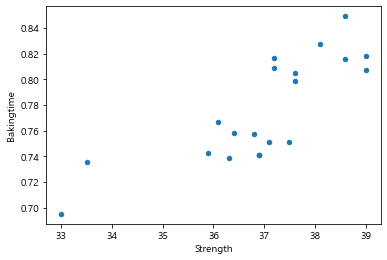

In [127]:
# 산점도 분석
df_raw.plot.scatter(x="Strength", y="Bakingtime")

- 산점도를 통해서 어느 정도 양의 상관관계가 있는 것으로 파악된다. 
- 상관계수를 통해 확실히 양의 상관관계가 있는지 알아보자.

In [128]:
# 상관관계 분석(상관계수)
df_raw.corr(method = "pearson").round(3)

,Strength,Bakingtime
Strength,1.000,0.804
Bakingtime,0.804,1.000


- 상관계수가 0.804로 두 변수는 강한 양의 상관 관계에 있다고 할 수 있다.

**3. 회귀 모델 생성**

In [136]:
# 선형 회귀 분석 이용. 상수항은 자동 추가
reg_model = smf.ols(formula = "Bakingtime ~ Strength", data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:             Bakingtime   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     32.90
Date:                Wed, 11 Aug 2021   Prob (F-statistic):           1.95e-05
Time:                        22:54:47   Log-Likelihood:                 46.530
No. Observations:                  20   AIC:                            -89.06
Df Residuals:                      18   BIC:                            -87.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0023      0.135      0.017      0.9

- Df Model이 1 : 모델 자유도가 1이다.
- Prob(F-statistic) 즉 p값이 유의수준 0.05보다 작으므로 회귀모델로서 유의해야한다. 모형의 적합성이 좋지 않다.
- R-square가 0.646으로 0보다 1에 더 가깝긴 하지만 그렇다고 1에 근사하진 않기 때문에 모형설명력이 좋다고는 할 수 없다. 즉 Strength로 Bakingtime 변동의 64.6%를 설명할 수 있다.
- p-value가 0.987로 기울기의 유의성이 있다. 하지만 Strength의 p값은 유의수준 0.05보다 작으므로 유의해야한다.
- Prob(Omnibus)가 유의수준 0.05보다 크므로 잔차는 정규성이 있다.

**4. 오차의 기본가정 검토**

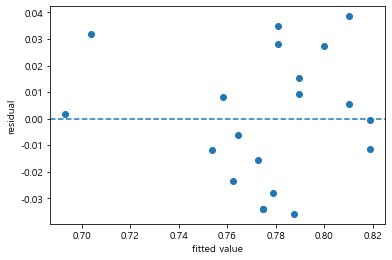

In [131]:
# 잔차의 등분산성 : X-예측값,  Y-잔차
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value"); plt.ylabel("residual")
plt.axhline(y=0, linestyle = "--")

- 경향성이 없고 랜덤하게 퍼져있기 때문에 등분산성을 만족한다.

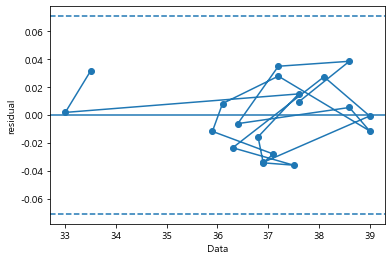

In [132]:
# 잔차의 독립성
plt.plot(df_raw["Strength"], reg_result.resid, marker="o")
plt.xlabel("Data")
plt.ylabel("residual")
plt.axhline(y=0, linestyle="-")
plt.axhline(y=3*np.std(reg_result.resid), linestyle="--")
plt.axhline(y=-3*np.std(reg_result.resid), linestyle="--")

In [133]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(reg_result.resid)

1.1281763812390104

- 독립성을 띄는 것 같은데 해석하기가 힘들어 durbin-watson 검정을 통해 통계량을 확인해보았다.
- 0에 가까우면 양의 상관, 2에 가까우면 독립인데 굳이 따지자면 2에 가까우므로 독립성을 띄는 것 같다.

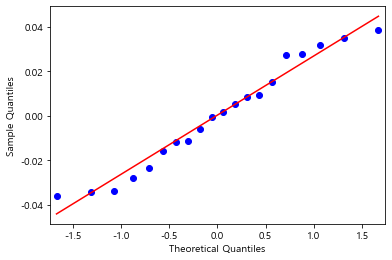

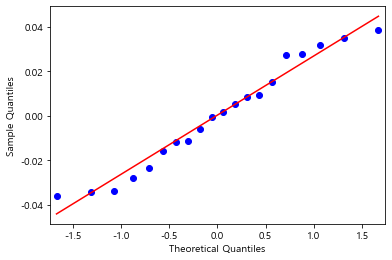

In [134]:
# 잔차의 정규성 검정
qqplot(reg_result.resid, line="q")

In [135]:
from statsmodels.stats.stattools import omni_normtest
omni_normtest(reg_result.resid, axis=0)

NormaltestResult(statistic=2.6513017707721476, pvalue=0.26563000811901577)

- qqplot과 omni_normtest를 통해 잔차의 정규성을 확인해보았는데 그래프에서는 두드러지게 직선에 가깝기 때문에 정규성이 있다고 볼 수 있다.
- 밑의 pvalue를 통해 귀무가설이 채택되므로 정규분포를 따른다.

#### 따라서 잔차의 전제사항인 정규성, 등분산성, 독립성을 충족하므로 선형회귀분석을 이용할 수 있다.

#### 위의 분석을 통해 잔차의 전제사항을 만족하며 선형회귀분석에서 기울기가 의미가 있다는 점에서는 좋지만,
#### 모형의 적합성, 설명력이 그다지 좋지 않다고 판단한다. 그래서 현장에 적용하면 잘 사용하기는 힘들 것 같다.